In [1]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# the 'EmployeeCount' column has all data same with value '1'.
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [5]:
# the 'Over18' column has all data same with value 'Y'.
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [6]:
# the 'StandardHours' column has all data same with value '80'.
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [7]:
# the 'EmployeeNumber' is the column with unique values to identify an employee.
len(df['EmployeeNumber'].unique())

1470

In [8]:
# dropping the columns with nominal and unhelpful data.
df.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours'],inplace=True)

In [9]:
# checking for duplicate entries. 
df.duplicated().value_counts()
# didn't find any.

False    1470
dtype: int64

In [10]:
# checking for any null values column-wise.
df.isnull().sum()
# didn't find any.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
# making a dataframe with object-datatype columns.
df_cat=df[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Attrition']]

In [12]:
# importing the Label Encoder and defining a function to apply it.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

def label_encode(column):
    df[column]= enc.fit_transform(df[[column]])

In [13]:
# encoding all the object-datatype columns.
for i in df_cat:
    label_encode(i)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


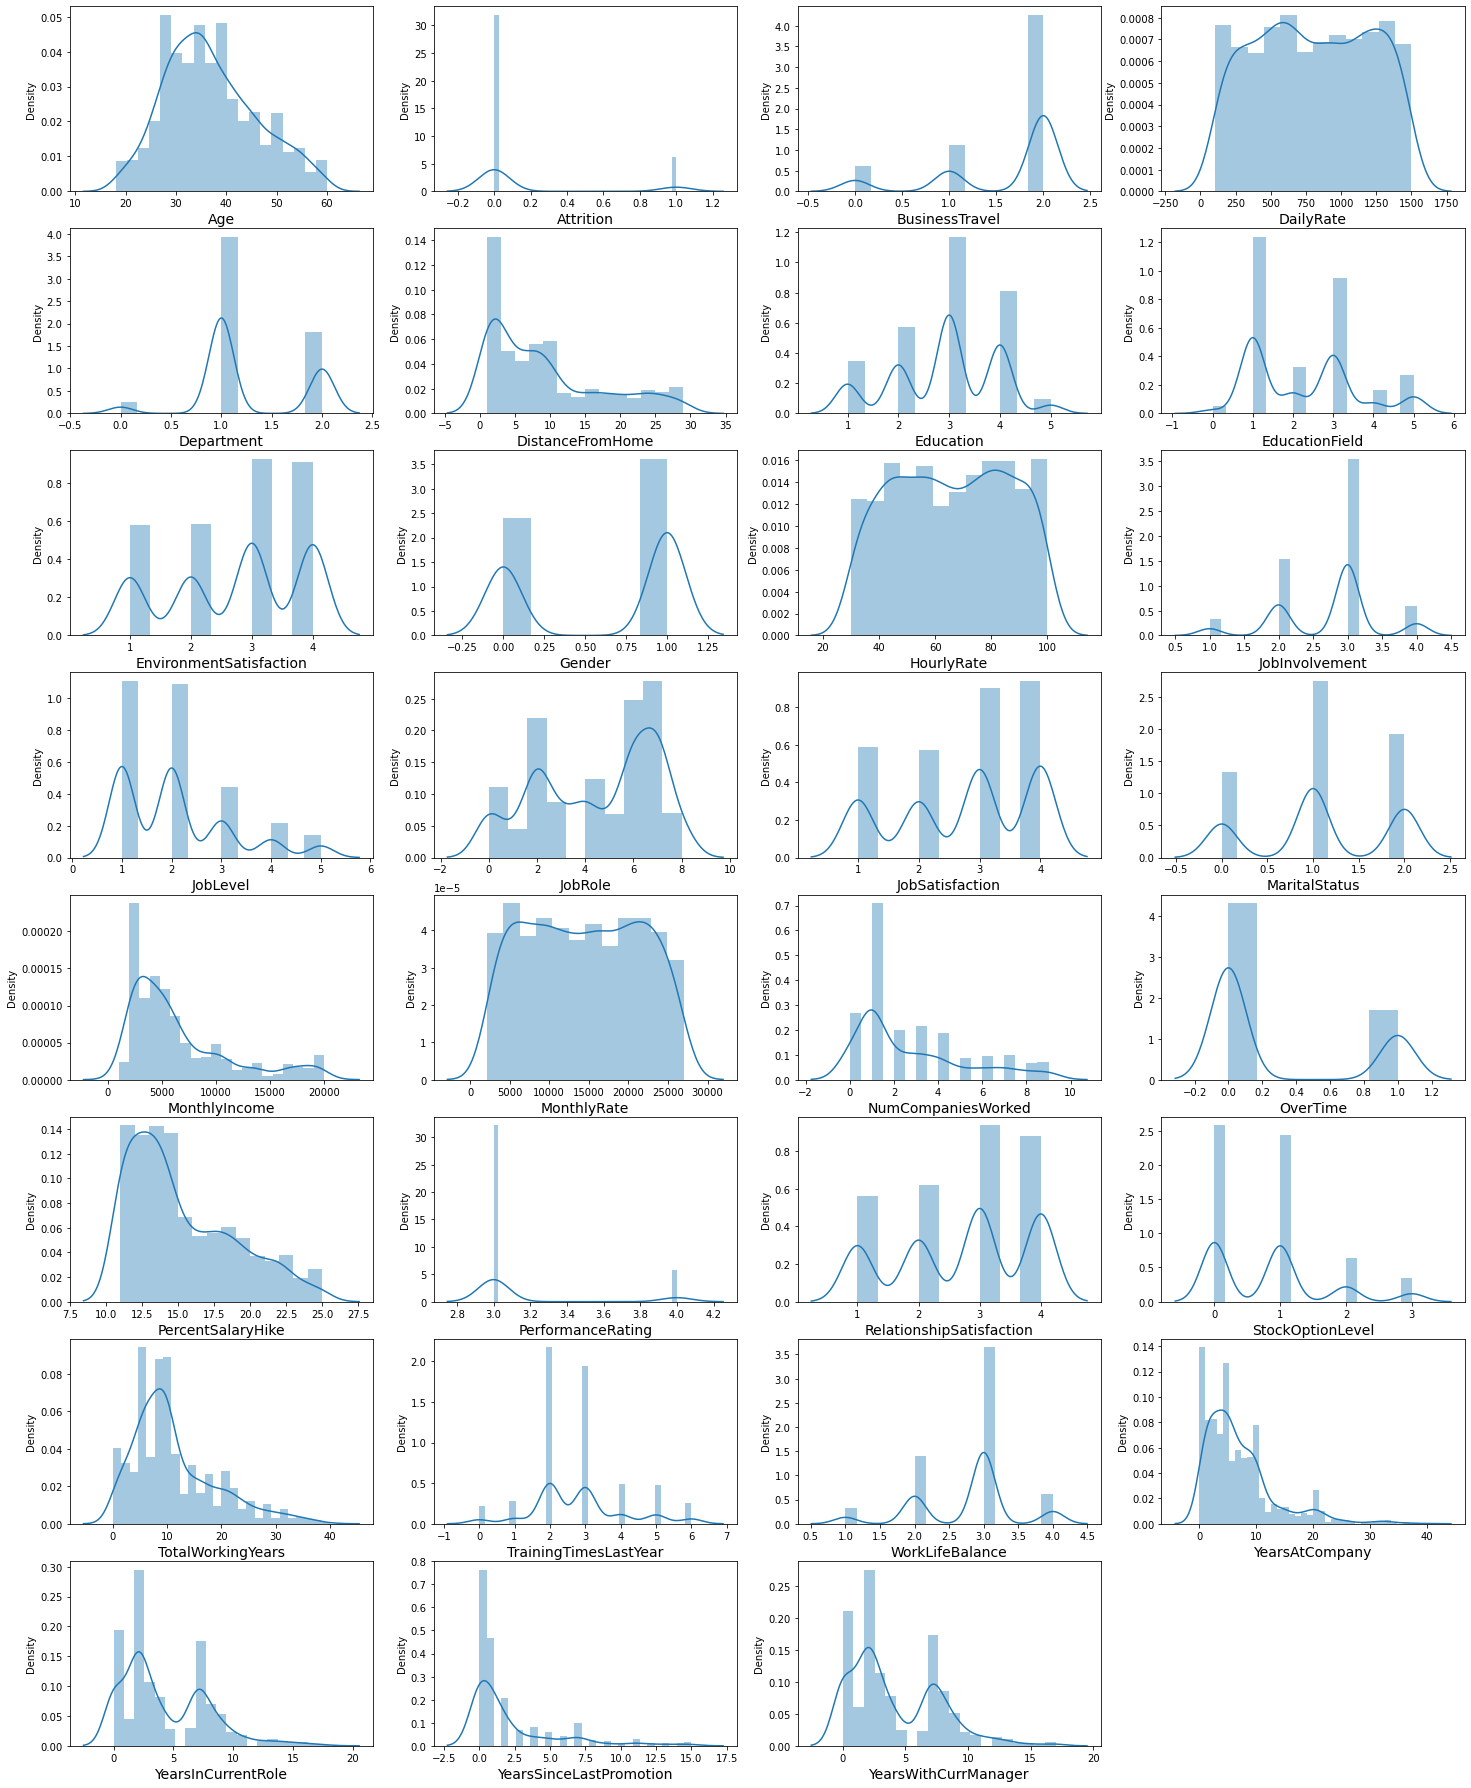

In [15]:
# let's see a basic overview of the data distributions that we have.
plt.figure(figsize=(25,32))
plotnumber=1
for column in df:
    if plotnumber<=32:
        ax= plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()

# Most of the columns are categorical in nature.

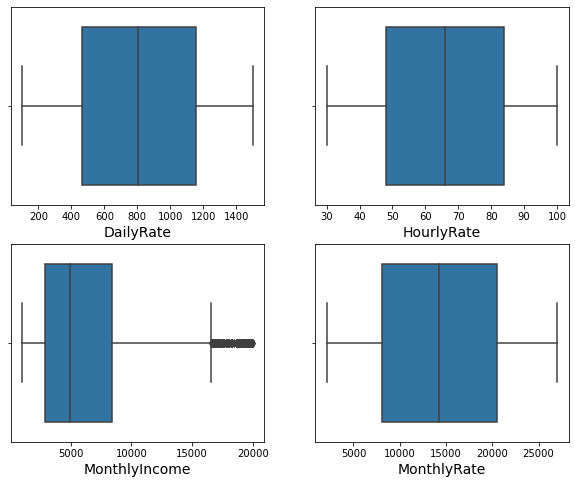

In [16]:
# Let's check the boxplot of our continuous varibles.
df_cont= df[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]

plt.figure(figsize=(10,8))
plotnumber=1
for column in df_cont:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()

# 'MonthlyIncome' column seems to have some outliers.

In [17]:
# removing the outliers using IQR method.

percentile25 = df['MonthlyIncome'].quantile(0.25)
percentile75 = df['MonthlyIncome'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['MonthlyIncome'] < upper_limit]
df = df[df['MonthlyIncome'] > lower_limit]
df.shape

(1356, 31)

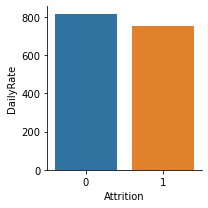

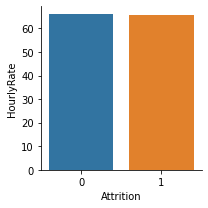

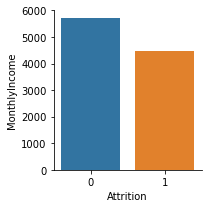

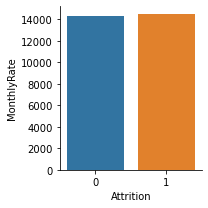

In [18]:
# Let's see the plot of our continuous variables vs the 'Attrition' column.

df_cont= df[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']]
for i in df_cont:
    sns.catplot(x="Attrition", y=i, kind="bar", data=df, height=3,ci=None)
    
# 'MonthlyIncome' might have a relation with attrition in the company.

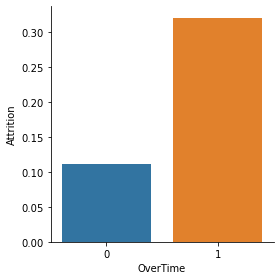

In [19]:
# Let's see the plot of 'OverTime' vs 'Attrition'.
sns.catplot(x="OverTime", y="Attrition", kind="bar", data=df, height=4,ci=None)

# It seems that the attrition is higher in the case of employees doing overtime.

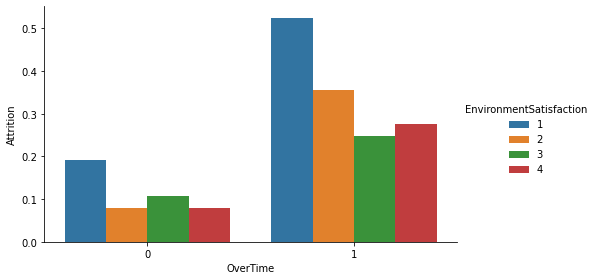

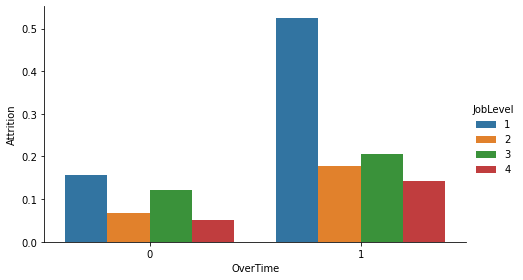

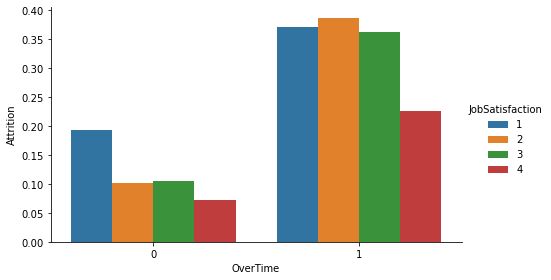

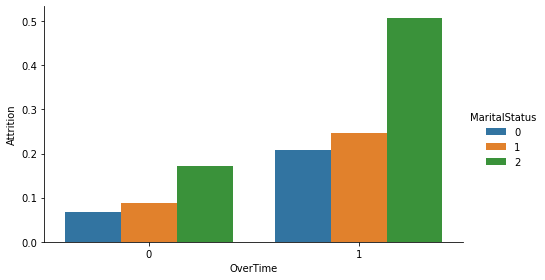

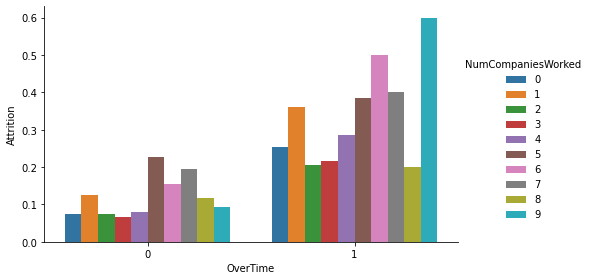

In [20]:
# Let's see the 'OverTime' vs 'Attrition' plot in more detail with color coding of other factors.

x= df[['EnvironmentSatisfaction','JobLevel','JobSatisfaction','MaritalStatus','NumCompaniesWorked']]
for i in x:
    sns.catplot(x="OverTime", y="Attrition", hue=i ,kind="bar", data=df,height=4, aspect=10/6, ci=None)
    
# Observations:
# 1. Overtime doing employees unsatisfied with their environment have a high attrition rate.
# 2. Overtime doing employees at the job-level 1 have a high attrition rate.
# 3. Overtime doing employees with a fairly good job-satisfaction also have relatively higher attrition.
# 4. Overtime doing employees who are single(MaritalStatus=2) have a high attrition rate.
# 5. Overtime doing employees who are frequent company jumpers(high number of companies worked for) have a high attrition rate.

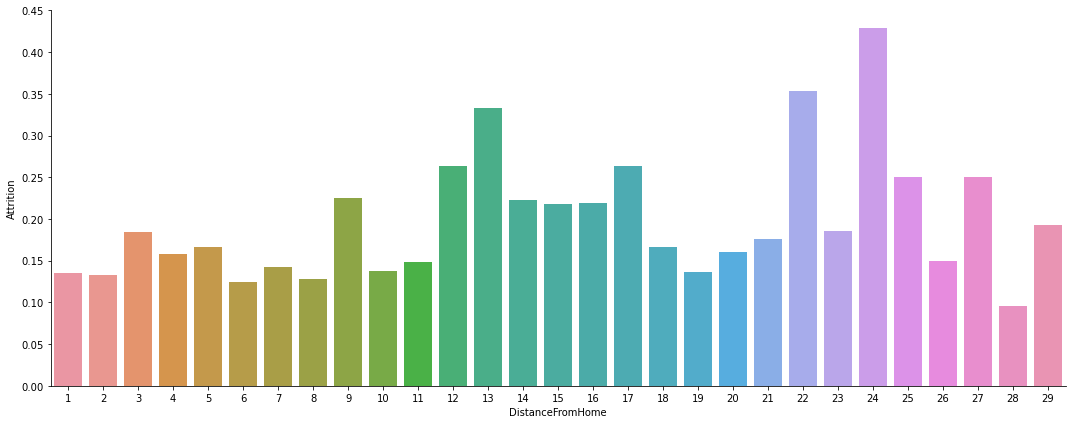

In [21]:
# Let's see the plot of 'DistanceFromHome' vs 'Attrition'.
sns.catplot(x="DistanceFromHome", y="Attrition", kind="bar", data=df,height=6, aspect=25/10, ci=None)

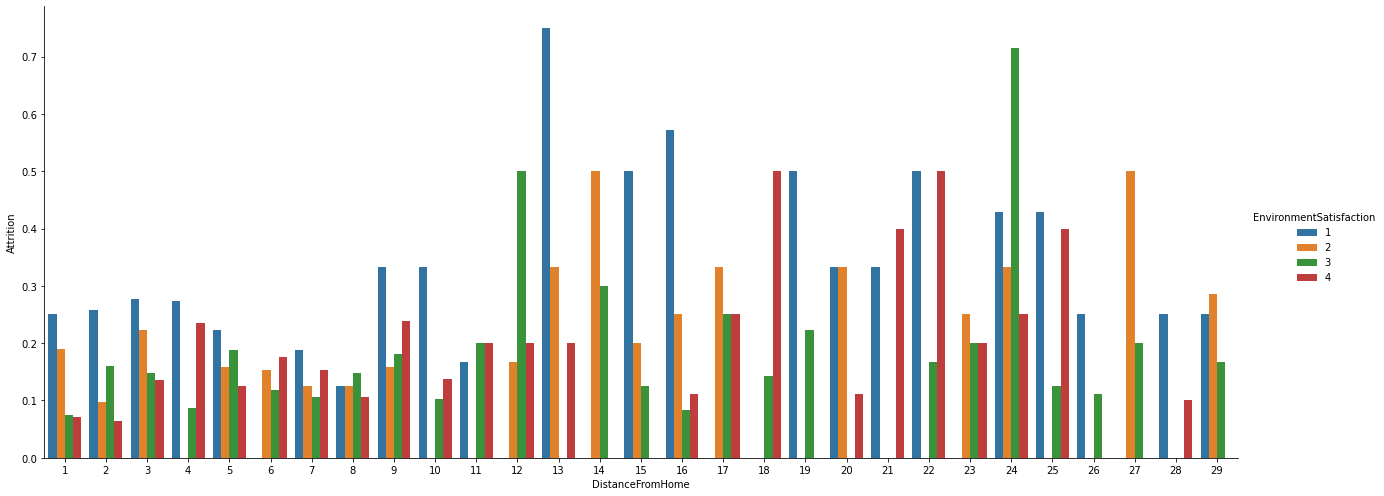

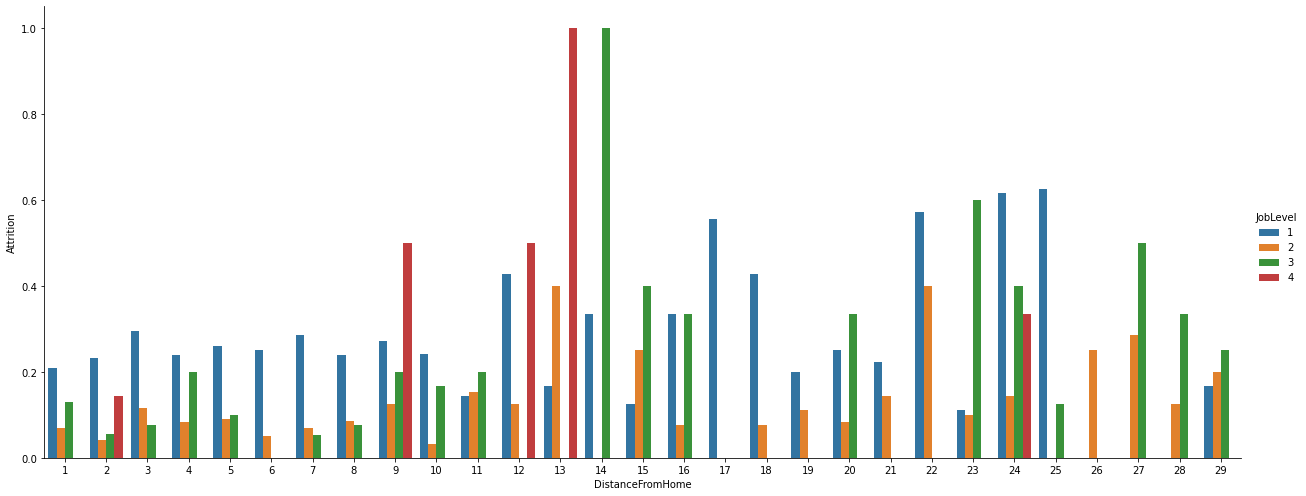

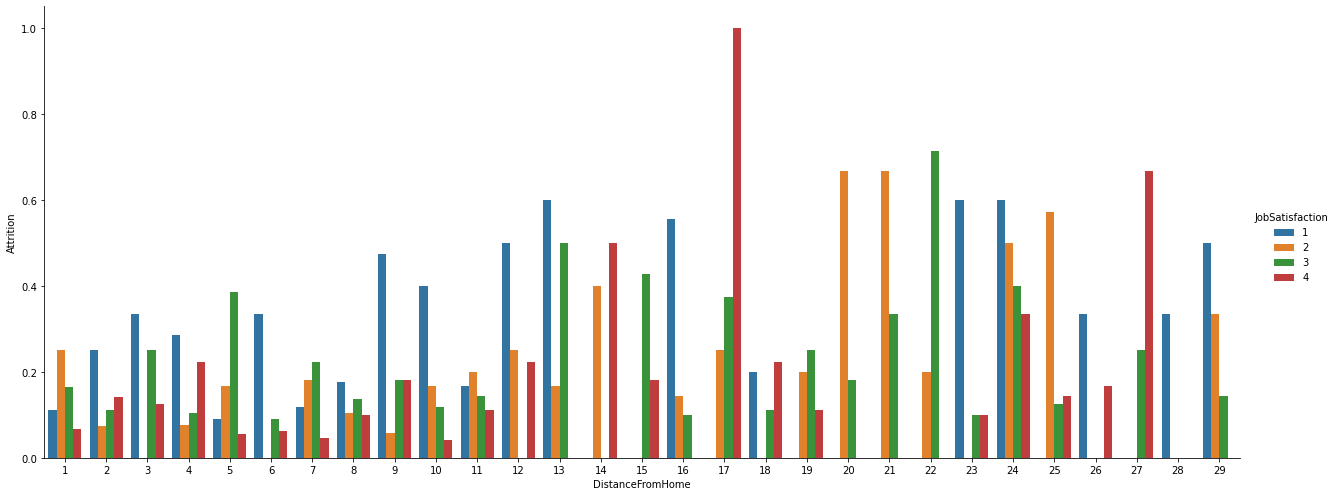

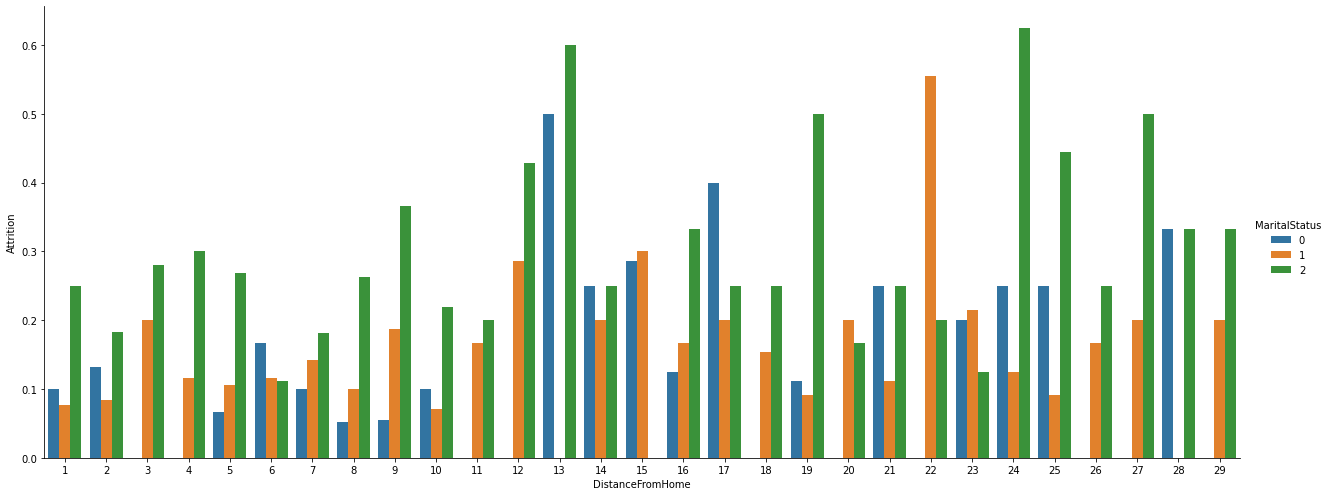

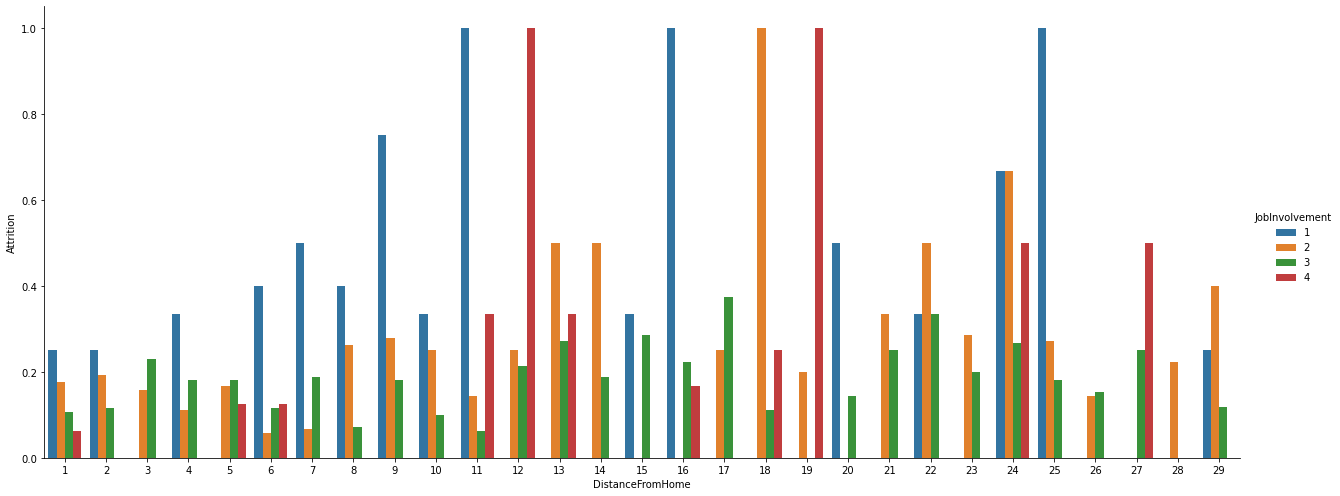

In [22]:
# Let's see the 'DistanceFromHome' vs 'Attrition' plot in more detail with color coding of other factors.
x= df[['EnvironmentSatisfaction','JobLevel','JobSatisfaction','MaritalStatus','JobInvolvement']]
for i in x:    
    sns.catplot(x="DistanceFromHome", y="Attrition",hue=i, kind="bar", data=df,height=7, aspect=25/10, ci=None)
    
# Observations:
# 1. Employees not satisfied with the environment('EnvironmentSatisfaction'=1) have a higher attrition.
# 2. The 'Attrition' at 'JobLevel'=1 is usually higher no matter the distance from home.
# 3. It can be seen that employees at higher 'JobLevel' of 3 and 4 tend to have a higher attrition as the distance from home grows. From distance
#    to home = 12 onwards the trend can be seen.
# 4. The employees wit 'JobSatisfaction'=1 usually have a higher attrition no matter the distance. But some employees with high 'JobSatisfaction'
#    also seems to have a high attrition when the distance from home increases.
# 5. Single(MaritalStatus=2) have a higher attrition no matter the distance.
# 6. Employees with lesser 'JobInvolvement' have a higher attrition no matter the distance.

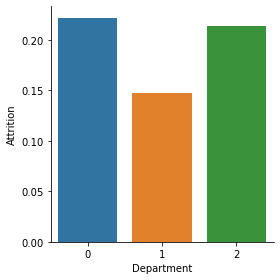

In [23]:
# Let's see the plot of 'Department' vs 'Attrition'.
sns.catplot(x="Department", y="Attrition", data=df, kind="bar",ci=None, height=4)

# The attrition in HR(Department=0) and Sales(Department=2) seems to be higher comared to R&D(Department=1)

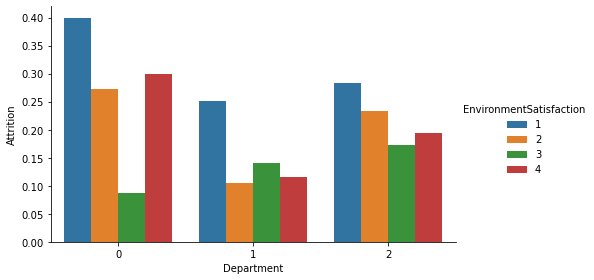

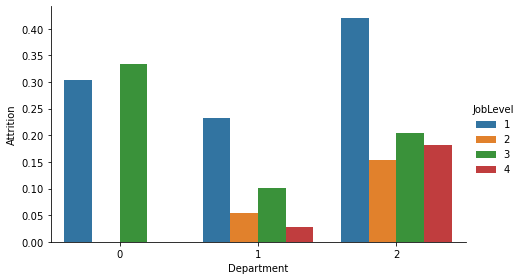

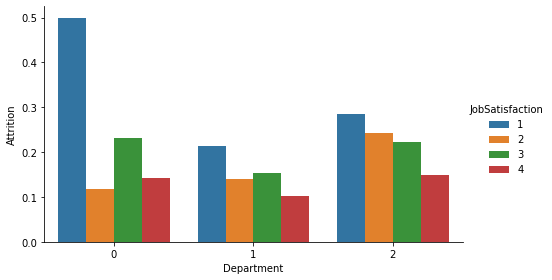

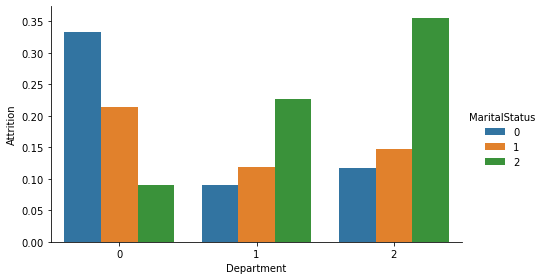

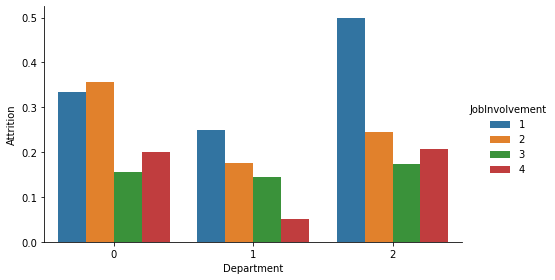

In [24]:
# Let's see the 'Department' vs 'Attrition' plot in more detail with color coding of other factors.
x= df[['EnvironmentSatisfaction','JobLevel','JobSatisfaction','MaritalStatus','JobInvolvement']]
for i in x:    
    sns.catplot(x="Department", y="Attrition",hue=i, kind="bar", data=df,height=4, aspect=10/6, ci=None)
    
# Observations:
# 1. Employees not satisfied with the environment('EnvironmentSatisfaction'=1) have a higher attrition in all departments.
# 2. The 'Attrition' at 'JobLevel'=1 is usually high in all departments. But in case if HR department employees at 'JobLevel'=3 have the highest attrition.
# 3. The employees with 'JobSatisfaction'=1 have a higher attrition in case of all departments but in case of HR it's unusually high.

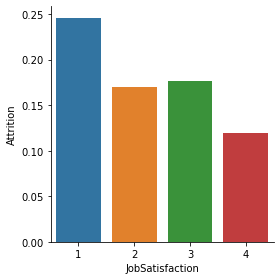

In [25]:
# Let's see the plot of 'JobSatisfaction' vs 'Attrition'.
sns.catplot(x="JobSatisfaction", y="Attrition", data=df, kind="bar",height=4,ci=None)

# Employees with 'JobSatisfaction'=1 have a higher attrition rate.

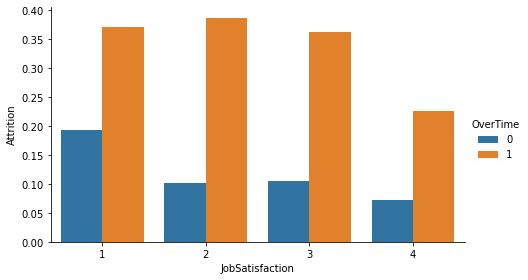

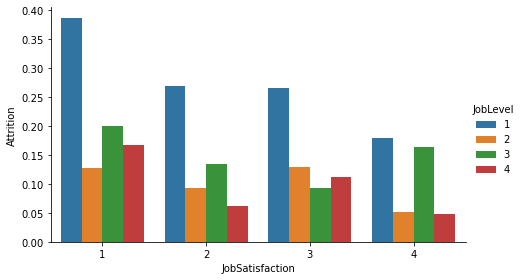

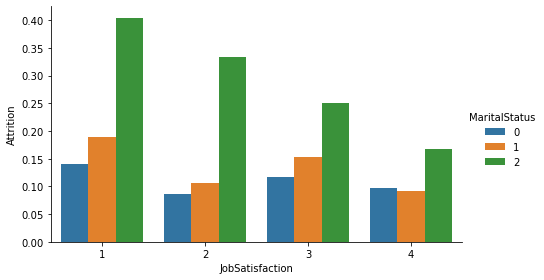

In [26]:
# Let's see the 'JobSatisfaction' vs 'Attrition' plot in more detail with color coding of other factors.
x= df[['OverTime','JobLevel','MaritalStatus']]
for i in x:
    sns.catplot(x="JobSatisfaction", y="Attrition", hue=i, data=df, kind="bar",height=4, aspect=10/6,ci=None)
    
# Observations:
# 1. Employees doing overtime have a much higher attrition rate no matter the level of 'JobSatisfaction'
# 2. Employees at 'JobLevel'=1 and single have a higher attrition.

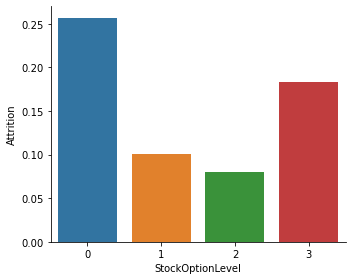

In [27]:
# Let's see the plot of 'StockOptionLevel' vs 'Attrition'
sns.catplot(x="StockOptionLevel", y="Attrition",data=df, kind="bar",height=4, aspect=10/8,ci=None)

# Employees with 'StockOptionLevel'=0 have a high attrition rate.

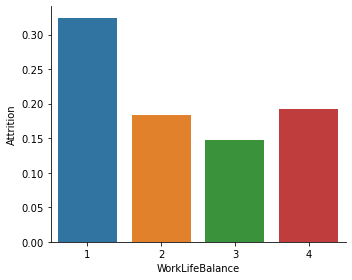

In [28]:
# Let's see the plot of 'WorkLifeBalance' vs 'Attrition'
sns.catplot(x="WorkLifeBalance", y="Attrition",data=df, kind="bar",height=4, aspect=10/8,ci=None)

# Employees with 'WorkLifeBalance'=1 have a higher attrition rate then others.

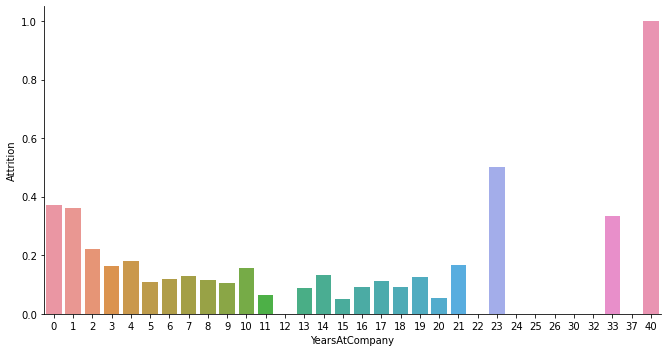

In [29]:
# Let's see the plot of 'YearsAtCompany' vs 'Attrition'
sns.catplot(x="YearsAtCompany", y="Attrition",data=df, kind="bar",height=5, aspect=15/8,ci=None)

# Employees which are new (1 or less years) have a higher attrition of almost 40%

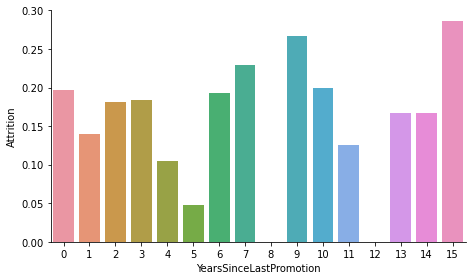

In [30]:
# Let's see the plot of 'YearsSinceLastPromotion' vs 'Attrition'
sns.catplot(x="YearsSinceLastPromotion", y="Attrition",data=df, kind="bar",height=4, aspect=10/6,ci=None)

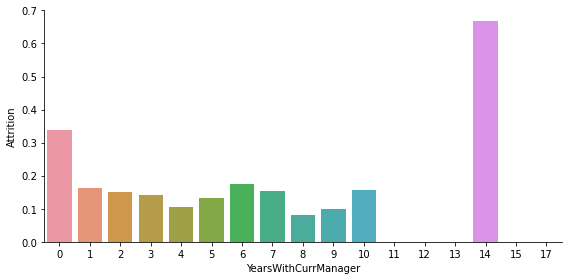

In [31]:
# Let's see the plot of 'YearsWithCurrManager' vs 'Attrition'
sns.catplot(x="YearsWithCurrManager", y="Attrition",data=df, kind="bar",height=4, aspect=10/5,ci=None)

<AxesSubplot:>

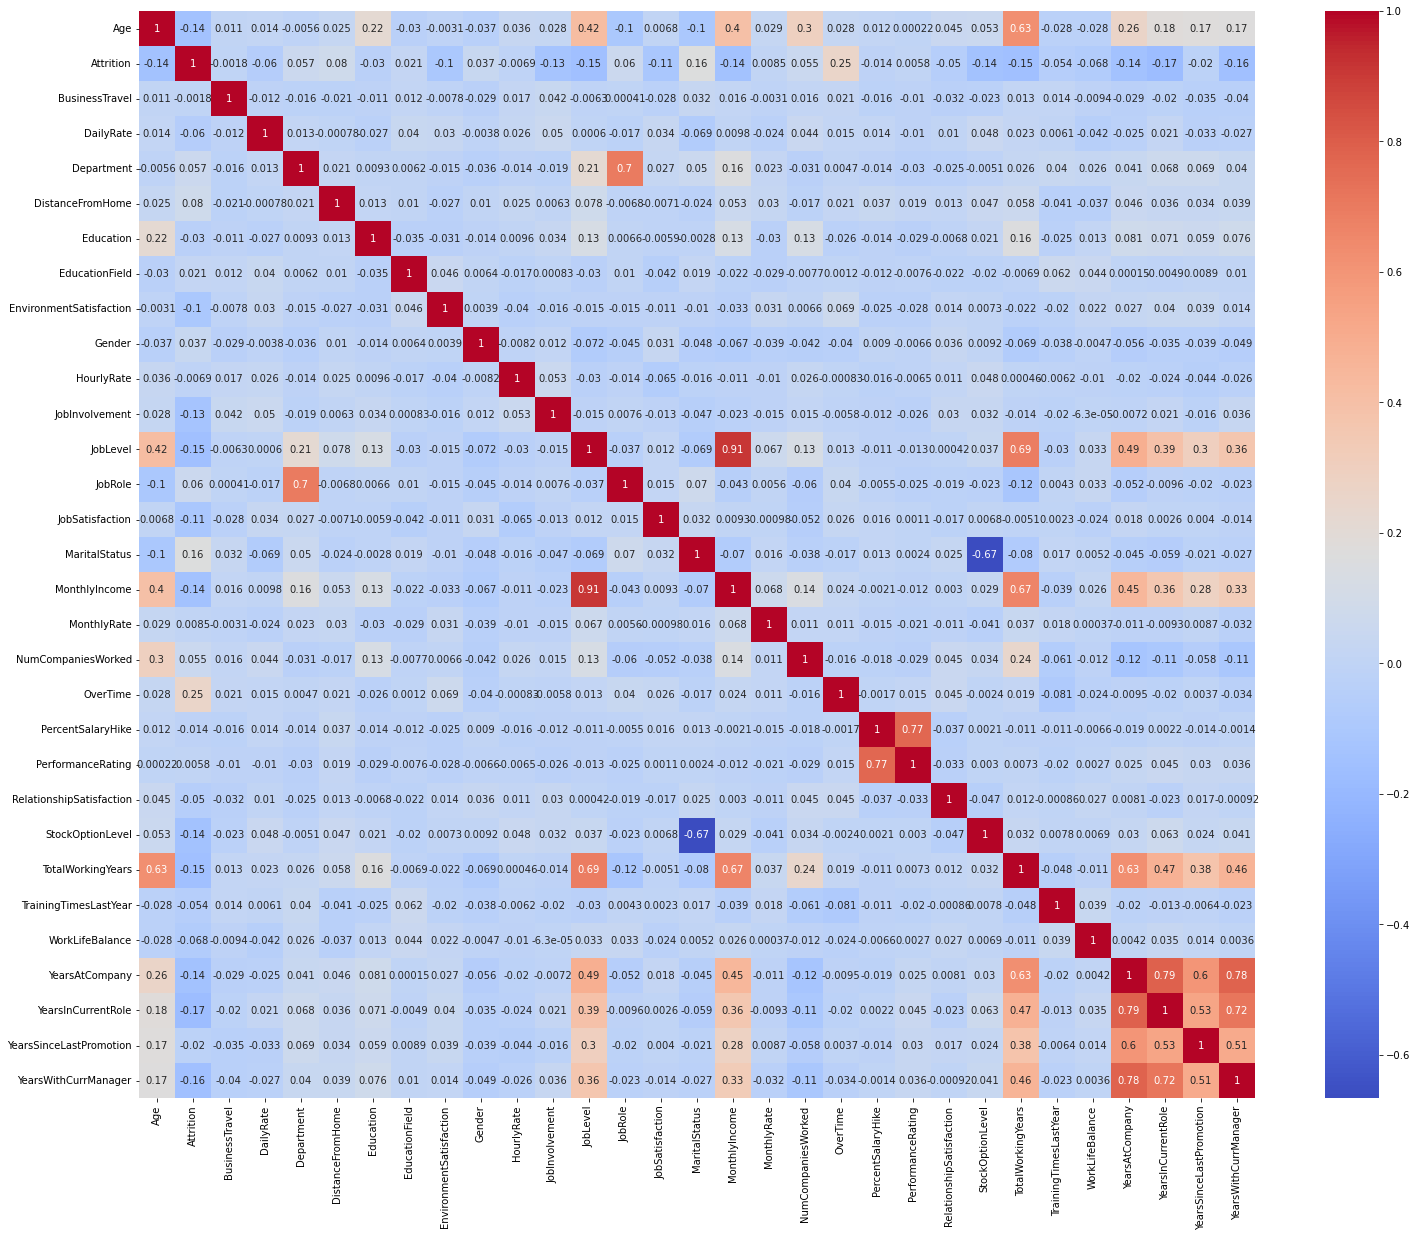

In [32]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# 'MonthlyIncome' and 'JobLevel' seems to have a strong correlation.
# 'TotalWorkingYears' and 'JobLevel' might have a correlation among them. 
# 'TotalWorkingYears' and 'MonthlyIncome' might have a correlation among them. 
# 'YearsAtCompany' and 'YearsWithCurrManager' might have a correlation among them.
# 'YearsAtCompany' and 'YearsInCurrentRole' might have a correlation among them.
# 'YearsInCurrentRole' and 'YearsWithCurrManager' might have a correlation among them.

In [33]:
# Let's check the collinearity using plots among the above probable columns.

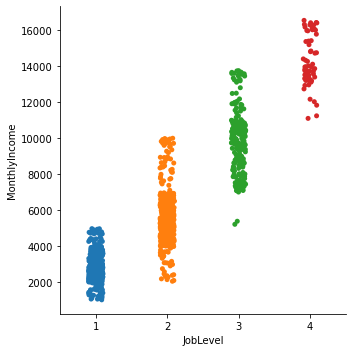

In [34]:
# the plot shows that as the 'JobLevel' increases the 'MonthlyIncome' increases too. They are directly related to each other.
sns.catplot(x="JobLevel", y="MonthlyIncome",data=df)

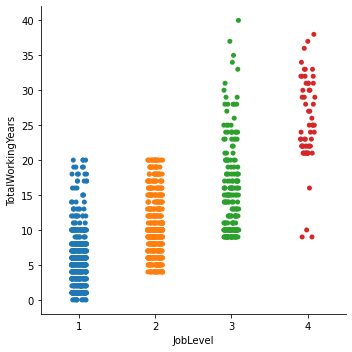

In [35]:
# the plot shows that as the 'TotalWorkingYears' increase the 'JobLevel' increses too with some exceptions.
sns.catplot(x="JobLevel", y="TotalWorkingYears",data=df)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

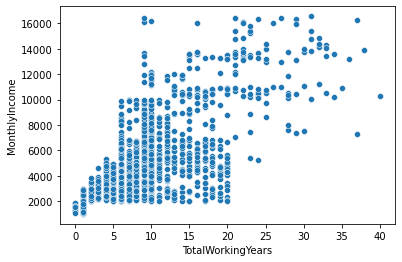

In [36]:
# the plot of 'TotalWorkingYears' vs 'MonthlyIncome' shows some positive relation but it's not that strong.
sns.scatterplot(x="TotalWorkingYears", y="MonthlyIncome",data=df)

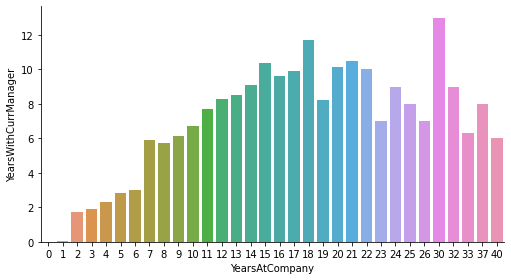

In [37]:
# the plot of 'YearsAtCompany' vs 'YearsWithCurrManager'. 
sns.catplot(x="YearsAtCompany", y="YearsWithCurrManager",data=df,kind='bar',ci=None, height=4,aspect=18/10)

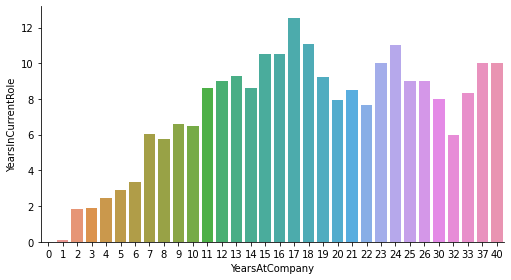

In [38]:
# the plot of 'YearsAtCompany' vs 'YearsInCurrentRole'. 
sns.catplot(x="YearsAtCompany", y="YearsInCurrentRole",data=df,kind='bar',ci=None, height=4,aspect=18/10)

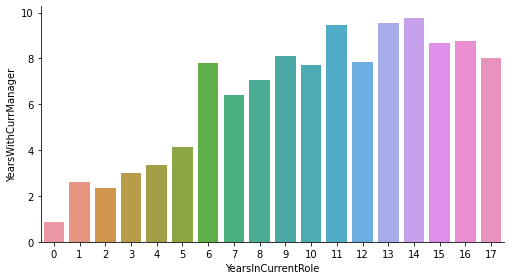

In [39]:
# the plot of 'YearsInCurrentRole' vs 'YearsWithCurrManager'. 
sns.catplot(x="YearsInCurrentRole", y="YearsWithCurrManager",data=df,kind='bar',ci=None, height=4,aspect=18/10)

In [40]:
# Let's check the skewness of data in our continuous-data columns.

df_cont= df[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']]
df_cont.skew()

# the skewness is well within the acceptable levels except in the case of 'MonthlyIncome' column.

DailyRate       -0.002620
HourlyRate      -0.035856
MonthlyRate      0.019849
MonthlyIncome    1.194390
dtype: float64

In [41]:
# Let's apply power-transformation on the 'MonthlyIncome' column to bring down the skewnwess.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="box-cox")

df['MonthlyIncome']= pt.fit_transform(df[['MonthlyIncome']])

df['MonthlyIncome'].skew()

0.01408396195829536

In [42]:
# Separating the features and label.
X= df.drop(columns=['Attrition'])
y= df['Attrition']

In [43]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [44]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# the 'JobLevel' and 'MonthlyIncome' have a multicollinearity problem.

         vif                  Features
0   1.814470                       Age
1   1.015297            BusinessTravel
2   1.030370                 DailyRate
3   2.273540                Department
4   1.019821          DistanceFromHome
5   1.070366                 Education
6   1.018401            EducationField
7   1.025751   EnvironmentSatisfaction
8   1.024360                    Gender
9   1.020666                HourlyRate
10  1.023626            JobInvolvement
11  5.715924                  JobLevel
12  2.143030                   JobRole
13  1.021144           JobSatisfaction
14  1.856986             MaritalStatus
15  5.010685             MonthlyIncome
16  1.018996               MonthlyRate
17  1.278337        NumCompaniesWorked
18  1.029037                  OverTime
19  2.482437         PercentSalaryHike
20  2.490352         PerformanceRating
21  1.021226  RelationshipSatisfaction
22  1.835979          StockOptionLevel
23  3.736127         TotalWorkingYears
24  1.028911     Training

In [45]:
# Let's check the correlation of our features with the label.
corr['Attrition']

# It can be seen that most of the features have a weak relation with our target variable.
# From the above observations there is a multicollinearity problem too.
# We can implement Principal-Component-Analysis(PCA) with our scaled features to tackle the multicollinearity and weak relation problem.

Age                        -0.143863
Attrition                   1.000000
BusinessTravel             -0.001793
DailyRate                  -0.060033
Department                  0.056586
DistanceFromHome            0.079641
Education                  -0.029800
EducationField              0.020898
EnvironmentSatisfaction    -0.104093
Gender                      0.036925
HourlyRate                 -0.006940
JobInvolvement             -0.129257
JobLevel                   -0.153071
JobRole                     0.060102
JobSatisfaction            -0.109451
MaritalStatus               0.161571
MonthlyIncome              -0.141278
MonthlyRate                 0.008536
NumCompaniesWorked          0.054737
OverTime                    0.251520
PercentSalaryHike          -0.014488
PerformanceRating           0.005796
RelationshipSatisfaction   -0.050487
StockOptionLevel           -0.141340
TotalWorkingYears          -0.154835
TrainingTimesLastYear      -0.054495
WorkLifeBalance            -0.068175
Y

In [46]:
# PCA on our feature columns.
from sklearn.decomposition import PCA
pca= PCA()
pca.fit_transform(X_scaled)

array([[ 0.13081566,  0.43868056, -2.33361861, ..., -0.56918351,
         0.39975246,  0.07813552],
       [ 1.09007592, -1.2542295 ,  2.55446108, ..., -0.52523736,
         0.27173436,  0.03847531],
       [-2.80570822,  0.89246688, -0.01326996, ...,  0.38761276,
        -0.05409971,  0.34818438],
       ...,
       [-0.83146809, -0.26757218,  2.29297888, ..., -0.62182391,
         0.37274755, -0.20034655],
       [ 1.52117929, -0.4726096 , -1.32707942, ...,  0.05218248,
        -0.35862481, -0.11540223],
       [-0.93804856,  0.50667746, -0.26762916, ..., -0.25700129,
         0.14368232,  0.25168017]])

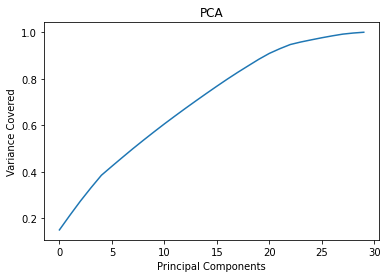

In [47]:
# Lets plot the scree-plot to check the number for best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

In [48]:
# Let's take 25 components and make a dataframe and move ahead with our model.
pca= PCA(n_components=25)
new_pcomp= pca.fit_transform(X_scaled)
p_comps= pd.DataFrame(new_pcomp)

In [49]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i,stratify=y)
   
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 87.41
Testing Score for sample 0 : 84.66


Training Score for sample 1 : 86.63
Testing Score for sample 1 : 86.73


Training Score for sample 2 : 87.41
Testing Score for sample 2 : 84.07


Training Score for sample 3 : 86.82
Testing Score for sample 3 : 86.14


Training Score for sample 4 : 86.23
Testing Score for sample 4 : 87.61


Training Score for sample 5 : 87.22
Testing Score for sample 5 : 86.14


Training Score for sample 6 : 86.92
Testing Score for sample 6 : 85.84


Training Score for sample 7 : 87.61
Testing Score for sample 7 : 86.14


Training Score for sample 8 : 87.02
Testing Score for sample 8 : 87.91


Training Score for sample 9 : 87.61
Testing Score for sample 9 : 85.55




In [50]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=i,stratify=y)

    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 84.07


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 84.07


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 84.66


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 84.66


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 83.78


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 84.37


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 84.37


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 84.96


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 83.78


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 82.89




In [51]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,stratify=y,random_state=i)
    
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 87.41
Testing Score for sample 0 : 82.3


Training Score for sample 1 : 87.12
Testing Score for sample 1 : 82.3


Training Score for sample 2 : 86.04
Testing Score for sample 2 : 83.78


Training Score for sample 3 : 85.55
Testing Score for sample 3 : 84.66


Training Score for sample 4 : 86.23
Testing Score for sample 4 : 84.07


Training Score for sample 5 : 85.84
Testing Score for sample 5 : 83.48


Training Score for sample 6 : 86.14
Testing Score for sample 6 : 83.19


Training Score for sample 7 : 85.55
Testing Score for sample 7 : 84.37


Training Score for sample 8 : 87.22
Testing Score for sample 8 : 82.3


Training Score for sample 9 : 86.23
Testing Score for sample 9 : 83.78




In [53]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,stratify=y,random_state=i)
    
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 91.74
Testing Score for sample 0 : 83.78


Training Score for sample 1 : 90.95
Testing Score for sample 1 : 84.66


Training Score for sample 2 : 91.35
Testing Score for sample 2 : 84.96


Training Score for sample 3 : 90.86
Testing Score for sample 3 : 85.84


Training Score for sample 4 : 91.05
Testing Score for sample 4 : 85.84


Training Score for sample 5 : 90.66
Testing Score for sample 5 : 86.14


Training Score for sample 6 : 90.86
Testing Score for sample 6 : 84.66


Training Score for sample 7 : 91.84
Testing Score for sample 7 : 85.55


Training Score for sample 8 : 91.94
Testing Score for sample 8 : 85.55


Training Score for sample 9 : 91.45
Testing Score for sample 9 : 86.14




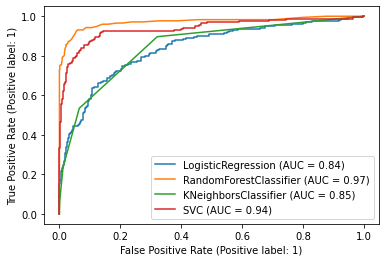

In [57]:
 # plotting the roc-auc curves for training data.
x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,stratify=y,random_state=1)

disp_train= plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rf,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(knn,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(svc,x_train,y_train, ax=disp_train.ax_)
plt.show()

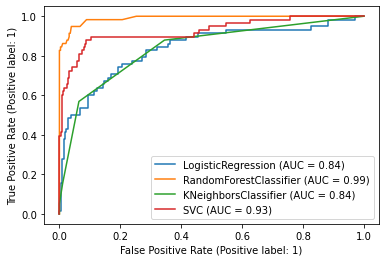

In [58]:
# plotting the roc-auc curves for testing data.

disp_test= plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(knn,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp_test.ax_)
plt.show()

# Random-Forests classifier seems to be giving the best results.

In [ ]:
# Based on ROC-AUC curves Random-Forests CLassifier is working best on our dataset as it has the highest area under the ROC curve in testing.
# So, let's move ahead with it and try to tune it further.

In [167]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"criterion":['gini', 'entropy'],
         "max_depth" :[8,10,13,15,20],
         "min_samples_split": range(2,4)
         "n_estimators": np.arange(100,300,50)
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 200}


In [61]:
# Taking the best sample split result and applying on the tuned Random Forests model.

x_train,x_test,y_train,y_test = train_test_split(p_comps,y,test_size=0.25,random_state=7,stratify=y)
rf_tuned =rf= RandomForestClassifier(n_jobs=-1,criterion='entropy',max_depth=20, min_samples_split=3, n_estimators=200)
rf_tuned.fit(x_train, y_train)
    
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,p_comps,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Training Score: 100.0
Testing Score: 85.25 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       281
           1       1.00      0.14      0.24        58

    accuracy                           0.85       339
   macro avg       0.92      0.57      0.58       339
weighted avg       0.87      0.85      0.80       339

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[281   0]
 [ 50   8]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 84.37
the cv score for 6 fold: 84.29
the cv score for 7 fold: 83.77
the cv score for 8 fold: 84.51
the cv score for 9 fold: 84.29


In [64]:
# saving the model using pickle.
import pickle 

HR_Analytics= "HR_Analytics_model.pickle"
pickle.dump(rf_tuned, open(HR_Analytics,'wb'))